In [23]:
import numpy as np

In [24]:
from scipy import signal 

In [25]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [47]:
fs = 10000*9.6
duration_time = 0.001
duration_count = int(duration_time*fs)
time_s = np.arange(duration_count)/fs
f = (6000-3000)/duration_time*time_s + 3000
s = np.sin(2*np.pi*f*time_s)
window = signal.get_window("hann", len(s), True)
window_s = s*window
duration_total = int(0.005*fs)
time = np.arange(duration_total)/fs
s_origin = np.concatenate((window_s, np.zeros(duration_total-len(s))))

<IPython.core.display.Javascript object>


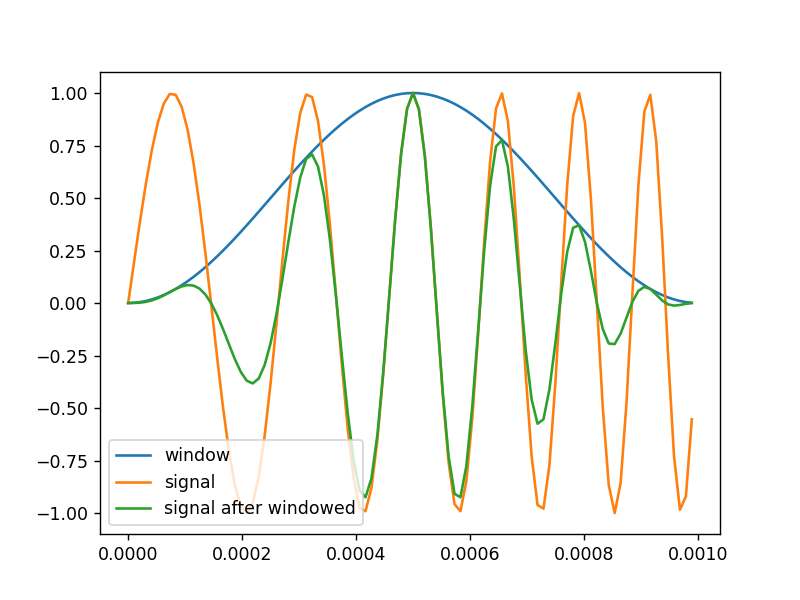

In [48]:
fig, ax = plt.subplots()
ax.plot(time_s, window, label="window")
ax.plot(time_s, s, label="signal")
ax.plot(time_s, window_s, label="signal after windowed")
ax.legend(loc=3)

<IPython.core.display.Javascript object>


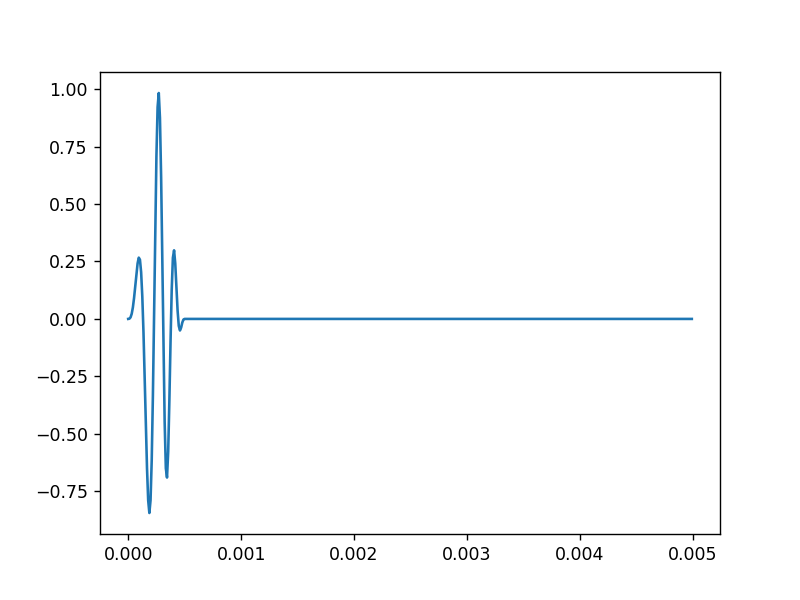

In [14]:
fig, ax = plt.subplots()
ax.plot(time, s_origin)

In [102]:
time_delay_1 = 0.002
time_delay_2 = 0.00238
alpha_1 = 0.04
alpha_2 = 0.1
s_1 = np.concatenate((np.zeros(int(time_delay_1*fs)), alpha_1*window_s))
s_1 = np.concatenate((s_1, np.zeros(duration_total-len(s_1))))
s_2 = np.concatenate((np.zeros(int(time_delay_2*fs)), alpha_2*window_s))
s_2 = np.concatenate((s_2, np.zeros(duration_total-len(s_2))))
np.random.seed(0)
signal_distorted = s_origin + s_1 + s_2 + 0.005*np.random.randn(len(s_origin))

<IPython.core.display.Javascript object>


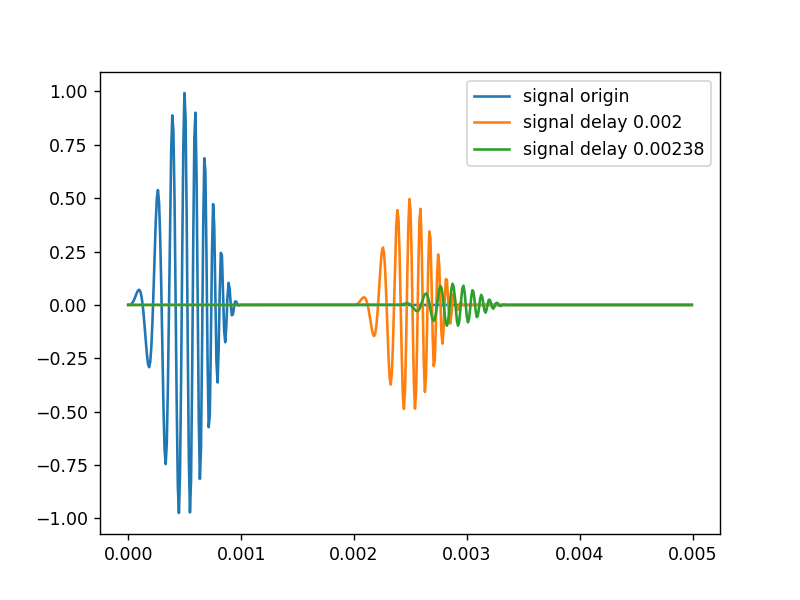

In [103]:
fig, ax = plt.subplots()
ax.plot(time, s_origin, label="signal origin")
ax.plot(time, s_1, label="signal delay {}".format(time_delay_1))
ax.plot(time, s_2, label="signal delay {}".format(time_delay_2))
ax.legend()

<IPython.core.display.Javascript object>


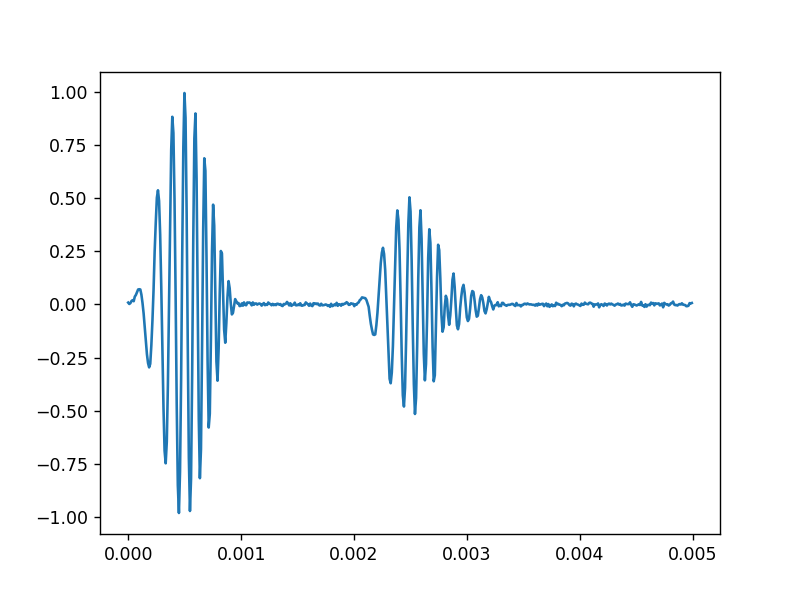

In [104]:
fig, ax = plt.subplots()
ax.plot(time, signal_distorted)

<IPython.core.display.Javascript object>


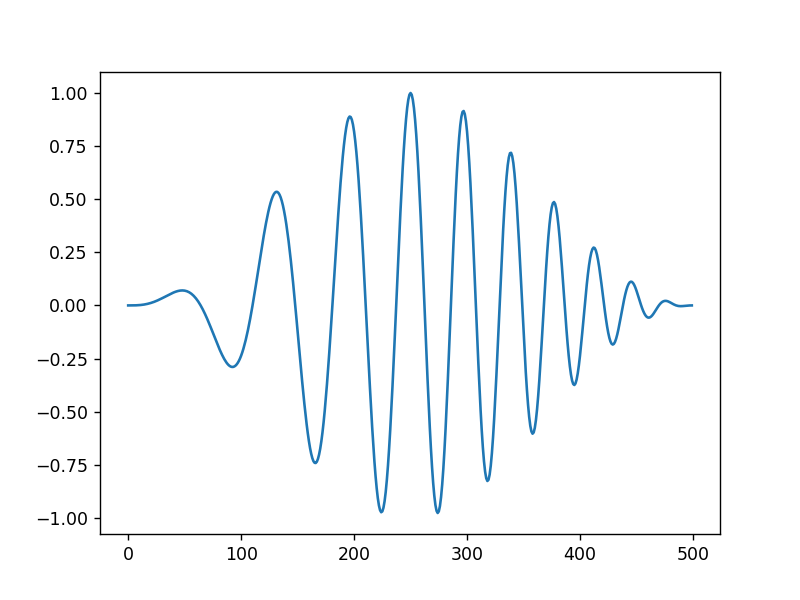

In [10]:
fig, ax = plt.subplots()
ax.plot(window_s)

<IPython.core.display.Javascript object>


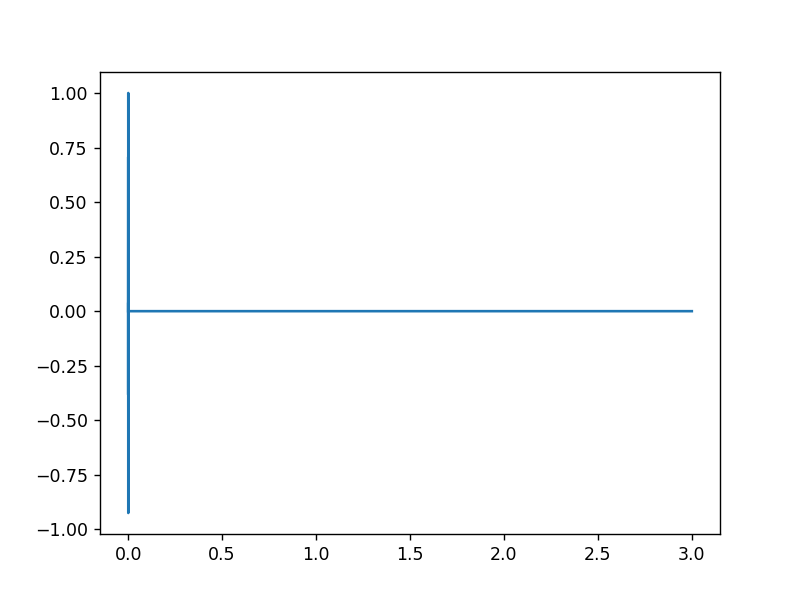

In [49]:
window_chirp_0001 = np.concatenate((window_s, np.zeros(int(fs*3))))
fig, ax = plt.subplots()
time = np.arange(len(window_chirp_0001))/fs
ax.plot(time, window_chirp_0001)

In [44]:
import soundfile as sf
sf.write("window_chirp_half_ms.wav", window_chirp_0001, int(fs))
# np.savetxt("1.csv", window_chirp_0001)

In [24]:
np.savetxt("test.trc", np.array([0,0,5,4,3,2,1,0,0]))

In [42]:
fs

96000.0

<IPython.core.display.Javascript object>


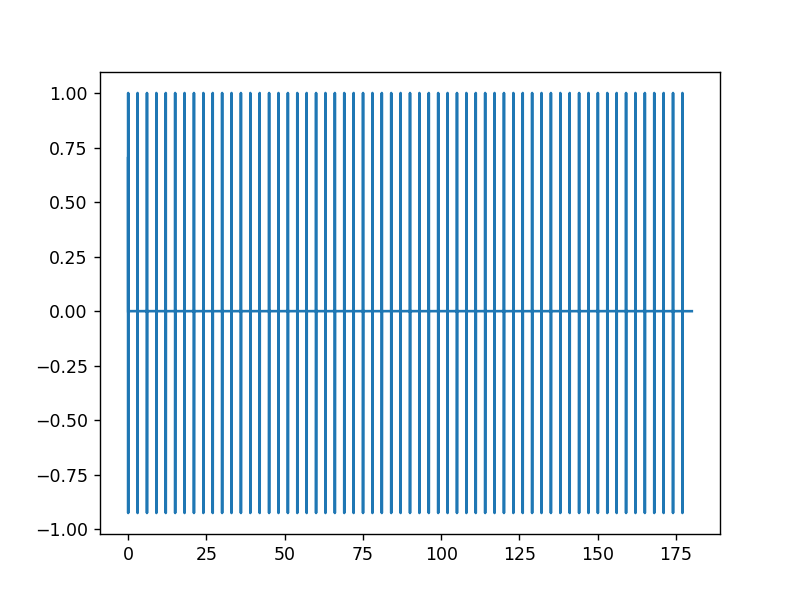

In [50]:
chirp_sound = window_chirp_0001
for i in range(59):
    chirp_sound = np.concatenate((chirp_sound, window_chirp_0001))
fig, ax = plt.subplots()
time = np.arange(len(chirp_sound))/fs
ax.plot(time, chirp_sound)

In [51]:
import soundfile as sf
sf.write("window_chirp_one_ms.wav", chirp_sound, int(fs))